# Copernicus Land Cover
This notebook uses the Copernicus (CGLS-LC100) land cover product derived from Proba-V over the period of 2015 to 2019. The notebook shows a land classification (22 classes) map for any selected year. <br><br>Future versions of this notebook will calculate land class change between two selected years. A change matrix will be used to display the change results and show the land area that has changed in each change category.

## Load the Data Cube Configuration and Import Utilities

In [1]:
# Ignore warnings 
import warnings
warnings.simplefilter('ignore')

# Load Data Cube Configuration
import datacube
dc = datacube.Datacube(app='CGLS_LandCover')

# Import Utilities
from utils.data_cube_utilities.dc_display_map import display_map
from matplotlib.colors import ListedColormap, BoundaryNorm
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define the Extents of the Analysis and View
Select the center of an analysis region (lat_long) below. The size of the region (in degrees) that surrounds this center point is defined using the "box_size_deg" parameter. Users can select one of the sample regions or add a new region. Use the map below to zoom in-or-out to find other regions. Click on the map to view a Lat-Lon position. 

In [2]:
# Kumasi, Ghana 
latitude = (6.45, 6.95) 
longitude = (-1.85, -1.35) 

# Dar es Salam, Tanzania 
# latitude = (-7.04, -6.60)
# longitude = (39.01, 39.41)

# Mid-Atlantic USA
# latitude = (36.5, 38.0)
# longitude = (-78.0, -75.0)

time_range = ('2015', '2019')

In [3]:
# View the analysis region
import folium
f = folium.Figure(width=600, height=600)
m = display_map(latitude,longitude)
f.add_child(m)

## Load the dataset

In [4]:
dataset = dc.load(product='proba_google', time=time_range, latitude=latitude, longitude=longitude)

In [5]:
dataset

<xarray.Dataset>
Dimensions:                        (latitude: 557, longitude: 558, time: 5)
Coordinates:
  * time                           (time) datetime64[ns] 2015-01-01 ... 2019-...
  * latitude                       (latitude) float64 6.95 6.949 ... 6.451 6.45
  * longitude                      (longitude) float64 -1.85 -1.849 ... -1.35
    spatial_ref                    int32 4326
Data variables: (12/14)
    discrete_classification        (time, latitude, longitude) int16 50 ... 116
    discrete_classification-proba  (time, latitude, longitude) int16 0 30 ... 35
    forest_type                    (time, latitude, longitude) int16 0 0 ... 0 0
    bare-coverfraction             (time, latitude, longitude) int16 0 0 ... 0 4
    crops-coverfraction            (time, latitude, longitude) int16 0 0 ... 0 4
    grass-coverfraction            (time, latitude, longitude) int16 2 21 ... 27
    ...                             ...
    tree-coverfraction             (time, latitude, longitude) int16 0 13 ... 30
    snow-coverfraction             (time, latitude, longitude) int16 0 0 ... 0 0
    urban-coverfraction            (time, latitude, longitude) int16 98 ... 17
    water-permanent-coverfraction  (time, latitude, longitude) int16 0 0 ... 0 0
    water-seasonal-coverfraction   (time, latitude, longitude) int16 0 0 ... 0 0
    data-density-indicator         (time, latitude, longitude) int16 56 ... 28
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

In [6]:
# Show data layer indices and corresponding years
# These indices will be used later to view the classification data
pd.DataFrame(list(dataset.time.values.astype('datetime64[D]')),columns=['Year'])

,Year
0,2015-01-01
1,2016-01-01
2,2017-01-01
3,2018-01-01
4,2019-01-01


### Create classification labels

In [7]:
labels = {0: {'color': '#282828', 'flag': 'unknown'},
          20: {'color': '#FFBB22', 'flag': 'shrubs'},
          30: {'color': '#FFFF4C', 'flag': 'herbaceous_vegetation'},
          40: {'color': '#F096FF', 'flag': 'cultivated_and_managed_vegetation_or_agriculture'},
          50: {'color': '#FA0000', 'flag': 'urban_or_built_up'},
          60: {'color': '#B4B4B4', 'flag': 'bare_or_sparse_vegetation'},
          70: {'color': '#F0F0F0', 'flag': 'snow_and_ice'},
          80: {'color': '#0032C8', 'flag': 'permanent_water_bodies'},
          90: {'color': '#0096A0', 'flag': 'herbaceous_wetland'},
          100: {'color': '#FAE6A0', 'flag': 'moss_and_lichen'},
          111: {'color': '#58481F', 'flag': 'closed_forest_evergreen_needle_leaf'},
          112: {'color': '#009900', 'flag': 'closed_forest_evergreen_broad_leaf'},
          113: {'color': '#70663E', 'flag': 'closed_forest_deciduous_needle_leaf'},
          114: {'color': '#00CC00', 'flag': 'closed_forest_deciduous_broad_leaf'},
          115: {'color': '#4E751F', 'flag': 'closed_forest_mixed'},
          116: {'color': '#007800', 'flag': 'closed_forest_not_matching_any_of_the_other_definitions'},
          121: {'color': '#666000', 'flag': 'open_forest_evergreen_needle_leaf'},
          122: {'color': '#8DB400', 'flag': 'open_forest_evergreen_broad_leaf'},
          123: {'color': '#8D7400', 'flag': 'open_forest_deciduous_needle_leaf'},
          124: {'color': '#A0DC00', 'flag': 'open_forest_deciduous_broad_leaf'},
          125: {'color': '#929900', 'flag': 'open_forest_mixed'},
          126: {'color': '#648C00', 'flag': 'open_forest_not_matching_any_of_the_other_definitions'},
          200: {'color': '#000080', 'flag': 'oceans_seas'}}

colors = [label['color'] for label in labels.values()]

### Create color map

In [8]:
cmap = ListedColormap([label['color'] for label in labels.values()])
norm = BoundaryNorm(list(labels.keys())+[201], cmap.N+1, extend='max')
ticks = list(np.mean((list(list(labels.keys())+[201])[i+1], val)) for i, val in enumerate(list(labels.keys())))

### Plot the classification data

In [9]:
# MODIFY HERE

# Choose a single year by its index (listed above)
year_to_show = 4

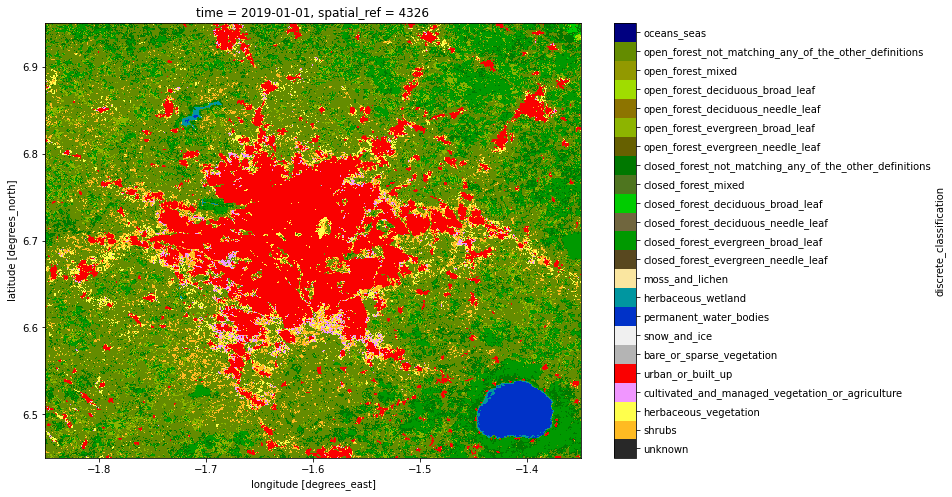

In [10]:
fig = dataset['discrete_classification'].isel(time=year_to_show).plot.imshow(cmap=cmap, size=8, norm=norm,
                                                                  cbar_kwargs=dict(ticks=ticks))
cbar = fig.colorbar
cbar.ax.set_yticklabels(labels=[label['flag'] for label in labels.values()]);

### Statistics
Display some basic statistics regarding the displayed data. This includes the number of pixels per classification and the percent of the scene covered by each class.

In [11]:
print('\033[1;4mTotal number of pixels for each classification.\033[0m')
for val, label in labels.items():
    print(f'{label["flag"]}: {np.sum(dataset.discrete_classification.isel(time=year_to_show).values == val)}')
    
print('\n\033[1;4mPercent of total pixel area.\033[0m')
for val, label in labels.items():
    area = np.sum(dataset.discrete_classification.isel(time=year_to_show).values == val)\
           /dataset.discrete_classification.isel(time=0).size * 100
    print(f'{label["flag"]}: {round(area, 2)}%')

Total number of pixels for each classification.
unknown: 0
shrubs: 15224
herbaceous_vegetation: 9656
cultivated_and_managed_vegetation_or_agriculture: 3702
urban_or_built_up: 51086
bare_or_sparse_vegetation: 0
snow_and_ice: 0
permanent_water_bodies: 4397
herbaceous_wetland: 656
moss_and_lichen: 0
closed_forest_evergreen_needle_leaf: 0
closed_forest_evergreen_broad_leaf: 38194
closed_forest_deciduous_needle_leaf: 0
closed_forest_deciduous_broad_leaf: 140
closed_forest_mixed: 0
closed_forest_not_matching_any_of_the_other_definitions: 26036
open_forest_evergreen_needle_leaf: 0
open_forest_evergreen_broad_leaf: 16361
open_forest_deciduous_needle_leaf: 0
open_forest_deciduous_broad_leaf: 39
open_forest_mixed: 0
open_forest_not_matching_any_of_the_other_definitions: 145315
oceans_seas: 0

Percent of total pixel area.
unknown: 0.0%
shrubs: 4.9%
herbaceous_vegetation: 3.11%
cultivated_and_managed_vegetation_or_agriculture: 1.19%
urban_or_built_up: 16.44%
bare_or_sparse_vegetation: 0.0%
snow_an

### Reference: Classification Descriptions

In [12]:
for val, label in labels.items():
    print(f'\033[1;4m{label["flag"]} ({val})\033[0m\n{dataset.discrete_classification.flags_definition[label["flag"]]["description"]}\n')

unknown (0)
Unknown. No or not enough satellite data available.

shrubs (20)
Shrubs. Woody perennial plants with persistent and woody stems and without any defined main stem being less than 5 m tall. The shrub foliage can be either evergreen or deciduous.

herbaceous_vegetation (30)
Herbaceous vegetation. Plants without persistent stem or shoots above ground and lacking definite firm structure. Tree and shrub cover is less than 10 %.

cultivated_and_managed_vegetation_or_agriculture (40)
Cultivated and managed vegetation / agriculture. Lands covered with temporary crops followed by harvest and a bare soil period (e.g., single and multiple cropping systems). Note that perennial woody crops will be classified as the appropriate forest or shrub land cover type.

urban_or_built_up (50)
Urban / built up. Land covered by buildings and other man-made structures.

bare_or_sparse_vegetation (60)
Bare / sparse vegetation. Lands with exposed soil, sand, or rocks and never has more than 10 % veget

## Create GeoTIFF Output Product

In [13]:
from utils.data_cube_utilities.import_export import export_slice_to_geotiff

In [14]:
# Change the name of the output file, or it will be overwritten for each run 
# export_slice_to_geotiff(dataset.isel(time=0),'output/Copernicus_100m_EXAMPLE.tif')

In [15]:
# !ls -lah output/